C:\Users\flare\AppData\Local\Temp\ipykernel_23356\3740891068.py:66: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  overlap = np.trapz(np.minimum(f0, f1), x_grid)


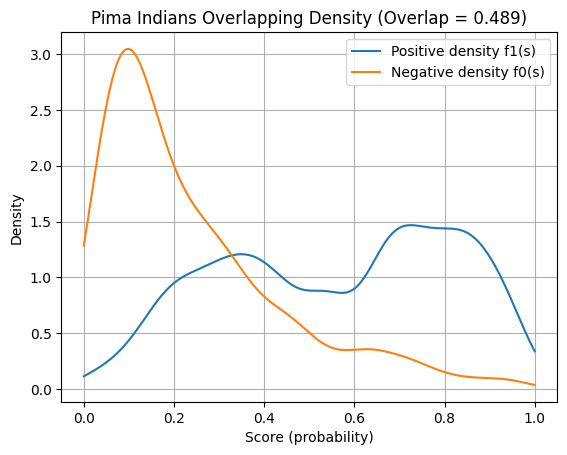

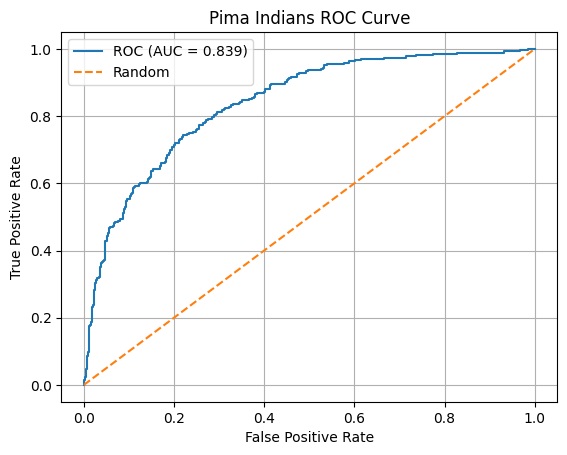

Overlap = 0.489
AUC = 0.839


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, roc_auc_score

# ============================================
# 0. Load Pima Indians dataset
# ============================================
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = [
    "pregnancy_x",
    "plasma_con",
    "blood_pressure",
    "skin_mm",
    "insulin",
    "bmi",
    "pedigree_func",
    "age",
    "target"
]

df = pd.read_csv(url, names=columns)

X = df[columns[:-1]].values
y = df["target"].values

# ============================================
# 1. Logistic Regression (score = probability)
# ============================================
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

model.fit(X, y)

# probability score of being positive (class 1)
scores = model.predict_proba(X)[:, 1]

# ============================================
# 2. KDE (Gaussian kernel) for Overlapping Plot
# ============================================
def kde_gaussian(sample, grid, h):
    sample = sample.reshape(1, -1)
    grid = grid.reshape(-1, 1)
    u = (grid - sample) / h
    k = np.exp(-0.5 * u**2) / np.sqrt(2.0 * np.pi)
    density = k.mean(axis=1) / h
    return density

pos_scores = scores[y == 1]
neg_scores = scores[y == 0]

x_grid = np.linspace(0.0, 1.0, 400)
h = 0.05

f1 = kde_gaussian(pos_scores, x_grid, h)
f0 = kde_gaussian(neg_scores, x_grid, h)

# Overlap integral
overlap = np.trapz(np.minimum(f0, f1), x_grid)

# ============================================
# 3. ROC and AUC
# ============================================
fpr, tpr, thresholds = roc_curve(y, scores)
auc = roc_auc_score(y, scores)

# ============================================
# 4. Plots
# ============================================

# Overlapping Density Plot
plt.figure()
plt.plot(x_grid, f1, label="Positive density f1(s)")
plt.plot(x_grid, f0, label="Negative density f0(s)")
plt.title(f"Pima Indians Overlapping Density (Overlap = {overlap:.3f})")
plt.xlabel("Score (probability)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Pima Indians ROC Curve")
plt.legend()
plt.grid(True)

plt.show()

print(f"Overlap = {overlap:.3f}")
print(f"AUC = {auc:.3f}")
